In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import colorlover as cl
sb.set()
%matplotlib inline

In [3]:
codes = pd.read_csv('country_codes.csv')
df = pd.read_csv('data.csv')
df = df.rename(columns={'Explained by: GDP per capita': 'GDP per capita', 'Explained by: Social support': 'Social support', 'Explained by: Healthy life expectancy': 'Healthy life expectancy', 'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Corruption'})
df = df.replace('Taiwan Province of China', 'Taiwan')
df = df.replace('South Korea', 'Korea, South')
df = df.replace('North Korea', 'Korea, North')
df = df.replace('Northern Cyprus', 'Cyprus')
df = df.replace('Hong Kong SAR, China', 'Hong Kong')
df = df.replace('Palestinian Territories', 'West Bank')
df = df.replace('Ivory Coast', 'Cote d\'Ivoire')
df = df.replace('Congo (Brazzaville)', 'Congo, Republic of the')
df = df.replace('Congo (Kinshasa)', 'Congo, Democratic Republic of the')
df = df.replace('Myanmar', 'Burma')

df = df.replace({'&': 'and'}, regex=True)
codes = codes.set_index("COUNTRY")
countryCodes = []

for row in df['Country']:
    countryCodes.append(codes.loc[row, 'CODE'])

df['Country Code'] = countryCodes
df.head()

Country  Happiness score  Whisker-high  Whisker-low  \
0      Finland            7.632         7.695        7.569   
1       Norway            7.594         7.657        7.530   
2      Denmark            7.555         7.623        7.487   
3      Iceland            7.495         7.593        7.398   
4  Switzerland            7.487         7.570        7.405   

   Dystopia (1.92) + residual  GDP per capita  Social support  \
0                       2.595           1.305           1.592   
1                       2.383           1.456           1.582   
2                       2.370           1.351           1.590   
3                       2.426           1.343           1.644   
4                       2.320           1.420           1.549   

   Healthy life expectancy  Freedom  Generosity  Corruption Country Code  
0                    0.874    0.681       0.192       0.393          FIN  
1                    0.861    0.686       0.286       0.340          NOR  
2                    0.868    0.683       0.284       0.408          DNK  
3                    0.914    0.677       0.353       0.138          ISL  
4                    0.927    0.660       0.256       0.357          CHE

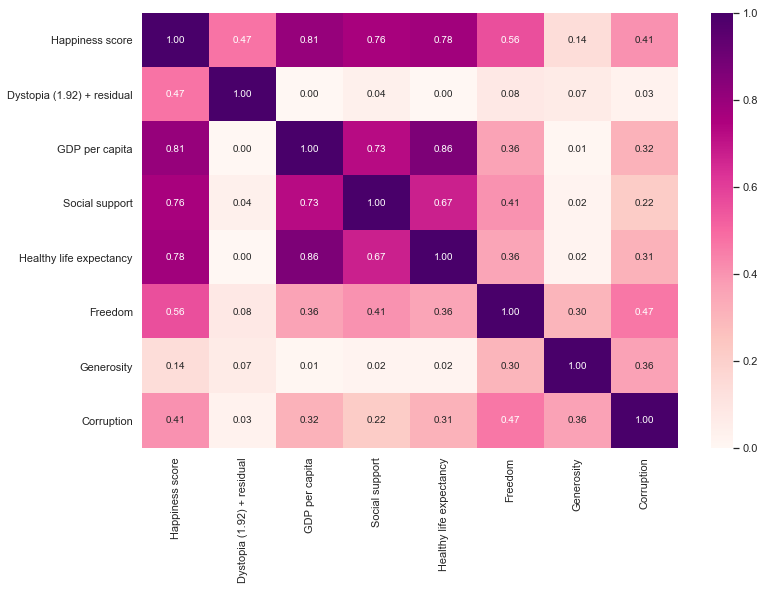

In [4]:
columns = ['Happiness score', 'Dystopia (1.92) + residual', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption']
trainDF = df[columns]

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=True)

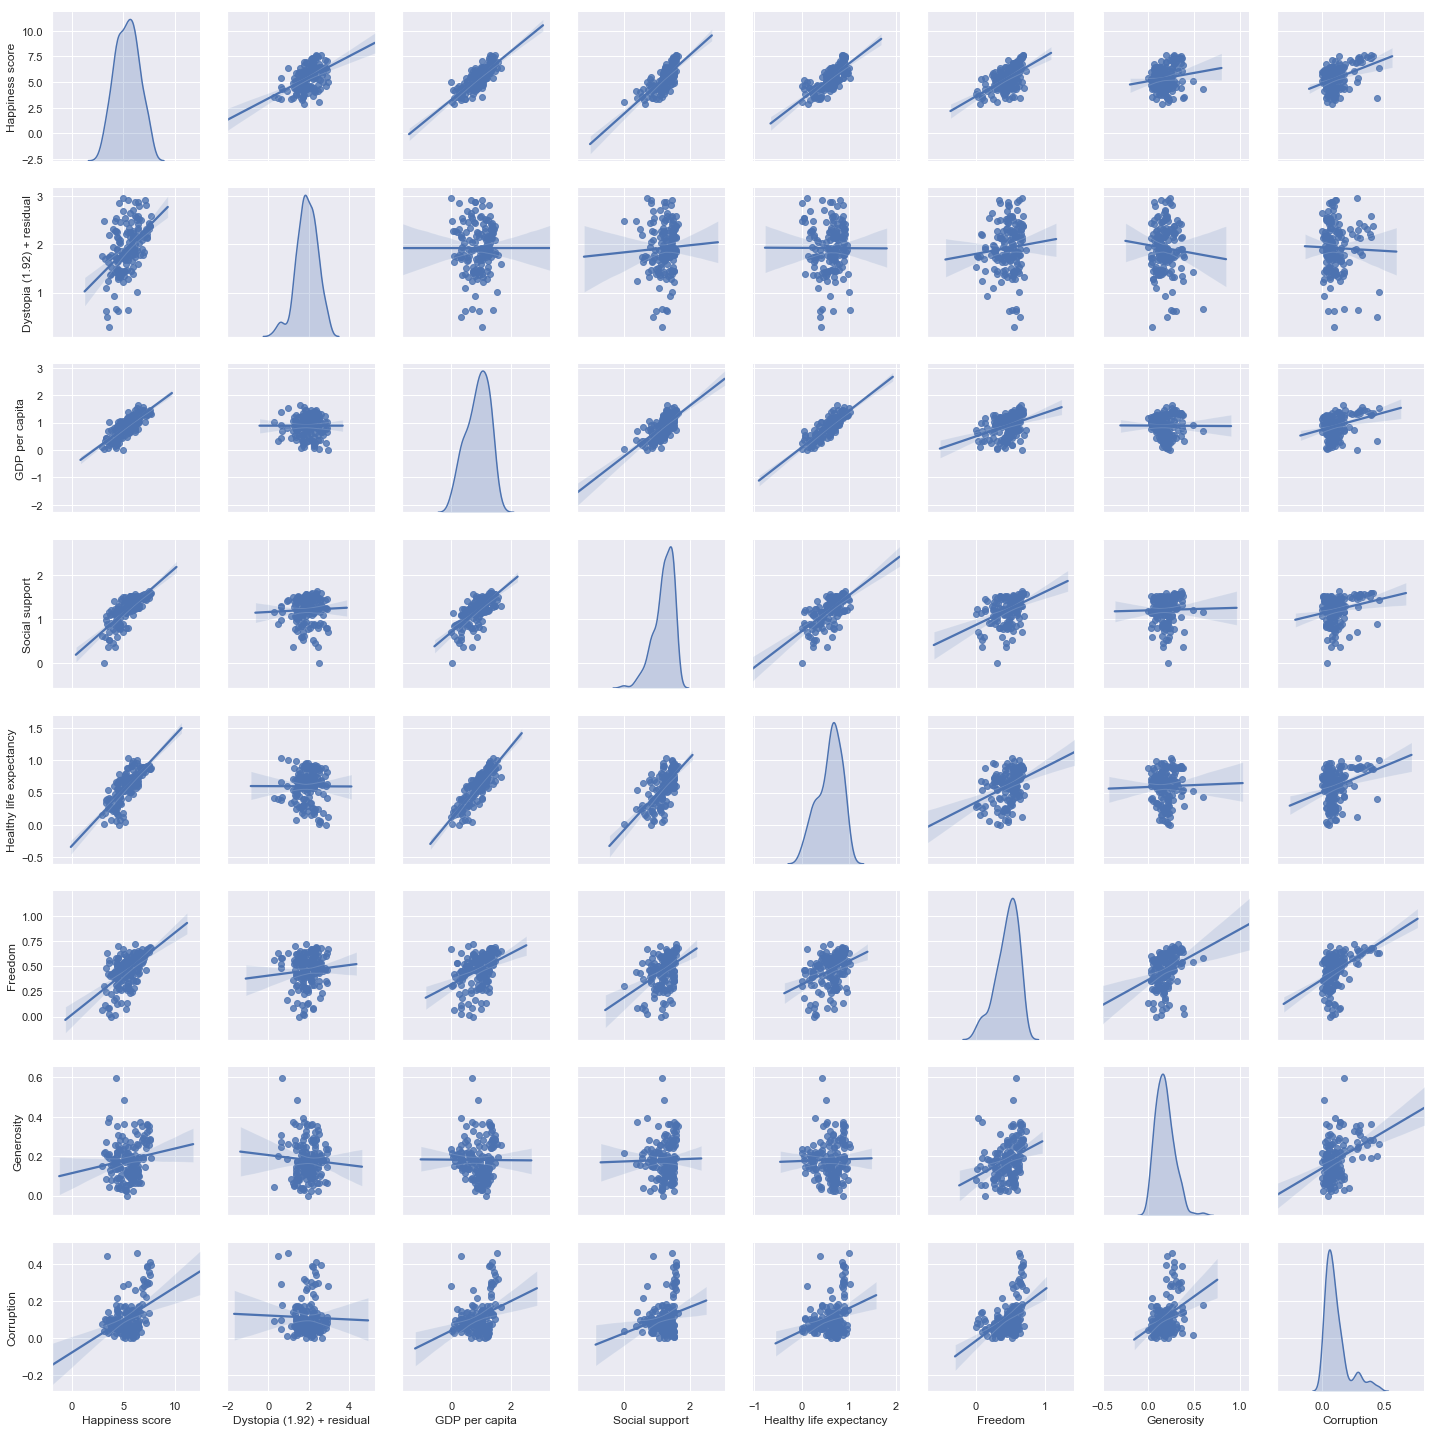

In [5]:
sb.pairplot(data = trainDF, diag_kind="kde", kind="reg")

In [6]:
data = [go.Choropleth(
    locations = df['Country Code'],
    z = df['Happiness score'],
    text = df['Country'],
    colorscale=[[0, 'rgb(0,255,0)'],
                [1, 'rgb(255,0,0)']],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Happiness Score'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'World Happiness 2018'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-chloropeth-map')

In [10]:
df['Happiness score'].describe()

count    156.000000
mean       5.375878
std        1.119507
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness score, dtype: float64

In [15]:
df_min = df[df['Happiness score'] == 2.905]
df_max = df[df['Happiness score'] == 7.632]

df_min.join

Country  Happiness score  Whisker-high Whisker-low  \
155  Burundi            2.905         3.074       2.735   

    Dystopia (1.92) + residual  GDP per capita  Social support  \
155                      1.752           0.091           0.627   

     Healthy life expectancy  Freedom  Generosity      ...       Whisker-high  \
155                    0.145    0.065       0.149      ...                NaN   

    Whisker-low Dystopia (1.92) + residual  GDP per capita  Social support  \
155         NaN                        NaN             NaN             NaN   

     Healthy life expectancy  Freedom  Generosity  Corruption  Country Code  
155                      NaN      NaN         NaN         NaN           NaN  

[1 rows x 24 columns]

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = pd.DataFrame(df)
y = pd.DataFrame(df['Happiness score'])

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Intercept of Regression 	: b =  [ 0.00046736]
Coefficients of Regression 	: a =  [[ 0.99978885  0.9995558   0.99983813  1.00056051  1.00016978  1.00008513
   1.00028976]]



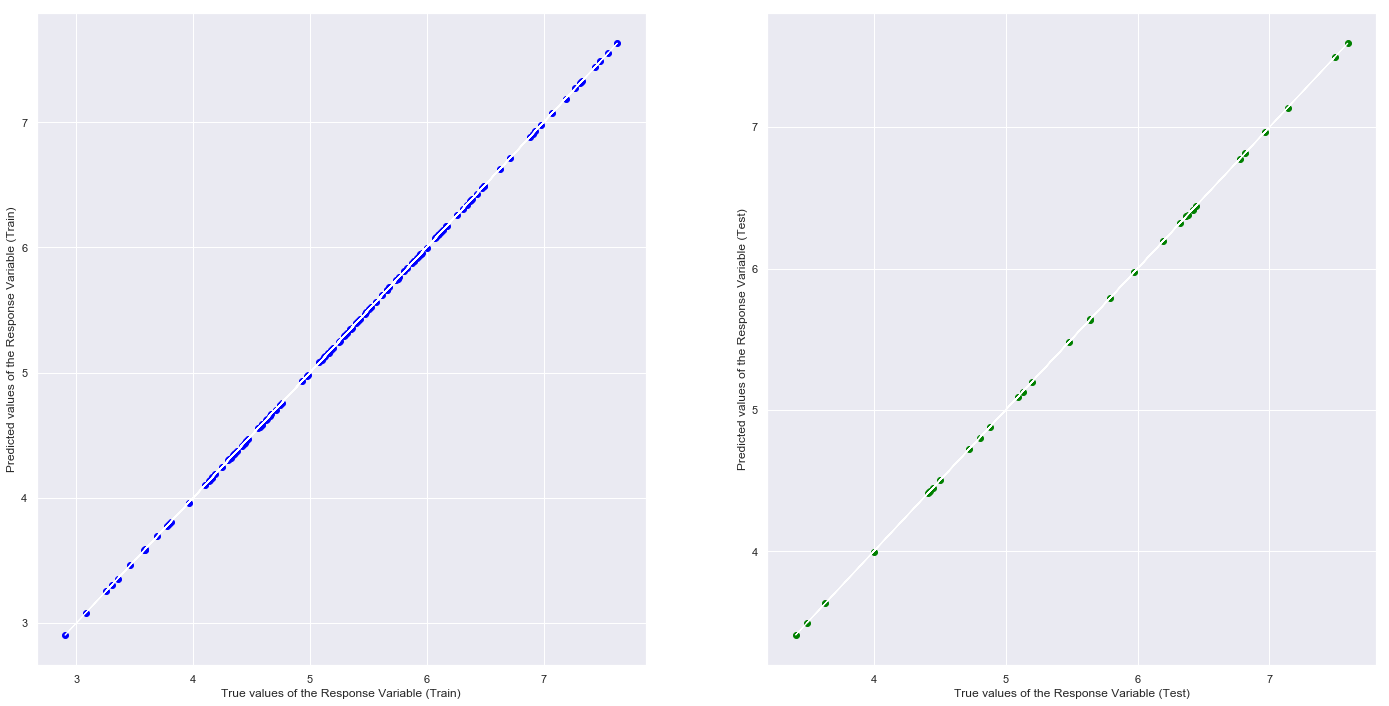

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.999999503785
Mean Squared Error (MSE) 	: 6.03102175367e-07

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.999999458009
Mean Squared Error (MSE) 	: 7.27153098287e-07



In [58]:
predictors = ['Dystopia (1.92) + residual', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption']

X_train = Xtrain[predictors]
X_test = Xtest[predictors]

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [43]:
from sklearn.preprocessing import PolynomialFeatures

newDF = df[['Social support', 'Happiness score']]

x = newDF.iloc[:,0:1].values
y = newDF.iloc[:,1].values

poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(x)

In [44]:
linreg = LinearRegression()
linreg.fit(poly_x, y)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  3.8101786946
Coefficients 	: a =  [ 0.         -1.1973787   1.92546798]


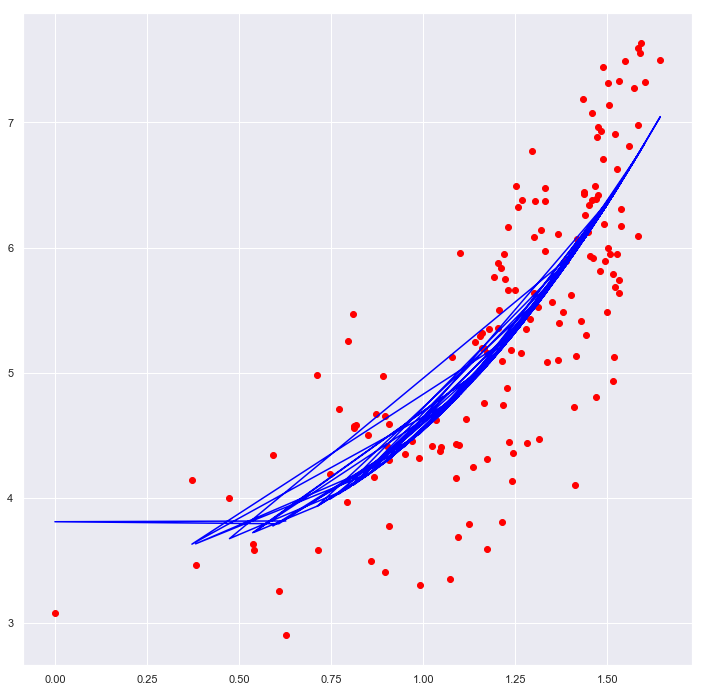

In [45]:
f, axes = plt.subplots(1, 1, figsize=(12, 12))
plt.scatter(x,y,color='red')
plt.plot(x,linreg.predict(poly.fit_transform(x)),color='blue')
plt.show()

In [70]:
historicalData = pd.read_csv('historical_data.csv')
#historicalData = df.rename(columns={'Explained by: GDP per capita': 'GDP per capita', 'Explained by: Social support': 'Social support', 'Explained by: Healthy life expectancy': 'Healthy life expectancy', 'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Corruption'})

In [71]:
historicalData.head(11)

country  year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008     3.723590            7.168690        0.450662   
1   Afghanistan  2009     4.401778            7.333790        0.552308   
2   Afghanistan  2010     4.758381            7.386629        0.539075   
3   Afghanistan  2011     3.831719            7.415019        0.521104   
4   Afghanistan  2012     3.782938            7.517126        0.520637   
5   Afghanistan  2013     3.572100            7.503376        0.483552   
6   Afghanistan  2014     3.130896            7.484583        0.525568   
7   Afghanistan  2015     3.982855            7.466215        0.528597   
8   Afghanistan  2016     4.220169            7.461401        0.559072   
9   Afghanistan  2017     2.661718            7.460144        0.490880   
10      Albania  2007     4.634252            9.077325        0.821372   

    Healthy life expectancy at birth  Freedom to make life choices  \
0                          49.209663                      0.718114   
1                          49.624432                      0.678896   
2                          50.008961                      0.600127   
3                          50.367298                      0.495901   
4                          50.709263                      0.530935   
5                          51.042980                      0.577955   
6                          51.370525                      0.508514   
7                          51.693527                      0.388928   
8                          52.016529                      0.522566   
9                          52.339527                      0.427011   
10                         66.576630                      0.528605   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0     0.181819                   0.881686         0.517637         0.258195   
1     0.203614                   0.850035         0.583926         0.237092   
2     0.137630                   0.706766         0.618265         0.275324   
3     0.175329                   0.731109         0.611387         0.267175   
4     0.247159                   0.775620         0.710385         0.267919   
5     0.074735                   0.823204         0.620585         0.273328   
6     0.118579                   0.871242         0.531691         0.374861   
7     0.094686                   0.880638         0.553553         0.339276   
8     0.057072                   0.793246         0.564953         0.348332   
9    -0.106340                   0.954393         0.496349         0.371326   
10   -0.016183                   0.874700         0.552678         0.246335   

    Confidence in national government  Democratic Quality  Delivery Quality  \
0                            0.612072           -1.929690         -1.655084   
1                            0.611545           -2.044093         -1.635025   
2                            0.299357           -1.991810         -1.617176   
3                            0.307386           -1.919018         -1.616221   
4                            0.435440           -1.842996         -1.404078   
5                            0.482847           -1.879709         -1.403036   
6                            0.409048           -1.773257         -1.312503   
7                            0.260557           -1.844364         -1.291594   
8                            0.324990           -1.917693         -1.432548   
9                            0.261179                 NaN               NaN   
10                           0.300681           -0.045108         -0.420024   

    Standard deviation of ladder by country-year  \
0                                       1.774662   
1                                       1.722688   
2                                       1.878622   
3                                       1.785360   
4                                       1.798283   
5                                       1.223690   
6               

In [73]:
predictors = ['Year', 'Dystopia (1.92) + residual', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption']
afghanistanData = historicalData[(historicalData['country'] == 'Finland') ]
afghanistanData

country  year  Life Ladder  Log GDP per capita  Social support  \
445  Finland  2006     7.672449           10.610194        0.964563   
446  Finland  2008     7.670627           10.659014        0.951340   
447  Finland  2010     7.393264           10.592831        0.935481   
448  Finland  2011     7.354225           10.613579        0.937857   
449  Finland  2012     7.420209           10.594456        0.927739   
450  Finland  2013     7.444636           10.582239        0.940869   
451  Finland  2014     7.384571           10.571767        0.952017   
452  Finland  2015     7.447926           10.568387        0.947801   
453  Finland  2016     7.659843           10.584640        0.953940   
454  Finland  2017     7.788252           10.612338        0.963826   

     Healthy life expectancy at birth  Freedom to make life choices  \
445                         69.435051                      0.968580   
446                         69.745049                      0.934179   
447                         70.010147                      0.916009   
448                         70.536072                      0.936448   
449                         70.672897                      0.920968   
450                         70.978622                      0.918625   
451                         71.158203                      0.933044   
452                         71.337791                      0.929862   
453                         71.517372                      0.948372   
454                         71.696960                      0.962199   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  \
445   -0.016036                   0.132430         0.721505         0.172134   
446    0.015997                   0.216568         0.772778         0.143539   
447    0.080166                   0.412516         0.832109         0.202095   
448    0.090361                   0.319593         0.772944         0.205239   
449   -0.012046                   0.360734         0.796285         0.201654   
450    0.028551                   0.305770         0.768957         0.194673   
451   -0.011548                   0.265480         0.784110         0.198814   
452    0.100915                   0.223370         0.751316         0.191058   
453   -0.036679                   0.249660         0.797325         0.181998   
454   -0.012174                   0.192413         0.787137         0.176066   

     Confidence in national government  Democratic Quality  Delivery Quality  \
445                           0.757926            1.497712          2.052642   
446                           0.723243            1.454463          1.980400   
447                           0.461844            1.455160          2.058373   
448                           0.565402            1.450511          2.052244   
449                           0.597942            1.500731          2.059123   
450                           0.420594            1.479439          2.041154   
451                           0.468559            1.412057          2.037090   
452                           0.557600            1.292035          1.997027   
453                           0.485727            1.223631          1.991702   
454                           0.597539                 NaN               NaN   

     Standard deviation of ladder by country-year  \
445                                      1.359368   
446                                      1.420638   
447                                      1.671738   
448                                      1.613047   
449                                      1.630132   
450                                      1.561880   
451                                      1.608321   
452                                      1.573618   
453                                      1.479019   
454                                      1.416398   

     Standard deviation/Mean of ladder by country-year  \
445                                  

In [ ]:
historical_data_pred = linreg.predict(afghanistanData[predictors])
historical_data_pred